In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import seaborn as sns
import numpy as np


In [30]:
df = pd.read_csv('cardio_train_clean.csv')

age = df['age']
gender = df['gender']
height = df['height']
weight = df['weight']
ap_hi = df['ap_hi']
ap_lo = df['ap_lo']
cholesterol = df['cholesterol']
gluc = df['gluc']
smoke = df['smoke']
alco = df['alco']
active = df['active']
cardio = df['cardio']
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


fonction pour trouver la meilleur de combinaison de colonne pour entrainer le model


In [32]:
# def generate_combinations(input_list):
#     import itertools
#     all_combinations = []

#     # generate all generation with size 2 , then 3 ect...
#     for i in range(2, 9):
#         combinations = list(itertools.combinations(input_list, i))
#         all_combinations.extend(combinations)
    
#     return all_combinations
# # , weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active
# columns = [ age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]
# strColumns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# target = cardio

# def FindBestFeatureCombination(allFeatures ,y,strFeatures):
#     best_score = float(0)
#     best_combination = []
#     allCombination= generate_combinations(allFeatures)
#     strCombination= generate_combinations(strFeatures)
#     strIndex = 0
#     for combination in allCombination:
#         # print(np.shape(combination))
#         # print(np.shape(y))
#         # divide dataset between test(80%) and train(20%)
#         combination = np.array(combination)
#         combination = combination.T
#         X_train, X_test, y_train, y_test = train_test_split(combination, y, test_size=0.2, random_state=0)
       
#         model = LogisticRegression(max_iter= 70000)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         score = accuracy_score( y_test,y_pred)
#         # if the score is better , we keep it 
#         if score > best_score:
#             best_score = score
#             best_combination = strCombination[strIndex]
#         strIndex +=1

#     # print the best combination with the best score 
#     print(f"Meilleure combinaison : {best_combination} avec un score de {best_score}")

# FindBestFeatureCombination(columns,target,strColumns)
# # generate_combinations(columns)

Entrainement du model

In [75]:
X = df[['age', 'gender', 'weight', 'ap_hi', 'cholesterol', 'active']].values

y= df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=10000)
model.fit(X,y)



LogisticRegression(max_iter=10000)

**7** \
Prédiction de rsique cardio vasculaire pour Arthur :
- 53 ans 
- fumeur
- sportif 
- 175 cm
- 85 kg
- taux de cholestérol au dessus de la normal 
- taux de glucose normal
- tension artérielle systolique dans la moyenne
- pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un
sujet à risques cardio-vasculaire.

In [74]:
arthur = [53,2,85,df['ap_hi'].mean(),2,1]
y_pred = model.predict([arthur])
y_pred_prob = model.predict_proba([arthur])
print(f"prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : " + str(y_pred))
print(f"probabilité de la prédiction : " + str(y_pred_prob[0][1]))

prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : [0]
probabilité de la prédiction : 0.08049401613423313


**7**  **Résultat** \
D'après l'algorythme , Arthur n'a pas de risque cardio vasculaire avec une probabilité de 0,08 , c'est a dire qu'il y a 8 % de risque cardio vasculaire 

Regression logistique sans parametre modifié


Accuracy: 0.7190714285714286
Matrice de confusion:
 [[5411 1658]
 [2275 4656]]
classification_report :
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



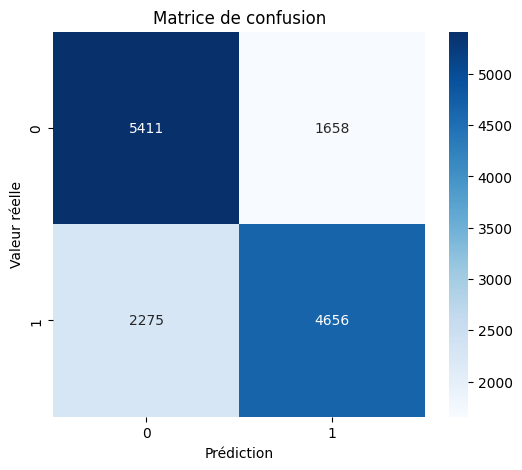

In [76]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

Modification des paramètres  afin d'avoir un meilleur de taux de bonne prédiction : 

Regression Logistique en modifiant le seuil de décision ❌

Accuracy: 0.7221428571428572
Matrice de confusion:
 [[5453 1616]
 [2274 4657]]
classification_report :
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      7069
           1       0.74      0.67      0.71      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



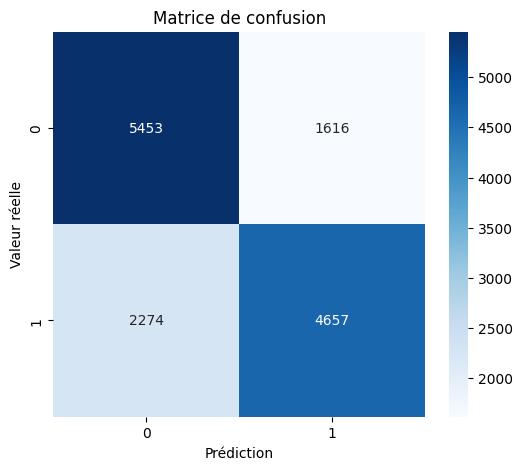

In [35]:

y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.45
y_pred_thresh = (y_prob >= threshold).astype(int)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

modification du L1 ❌

In [ ]:

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleur paramètre C :", grid.best_params_)

Meilleur paramètre C : {'C': 0.1}


Essaie avec class_weight = "balanced" ❌

Accuracy: 0.7187857142857143
Matrice de confusion:
 [[5406 1663]
 [2274 4657]]
classification_report :
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



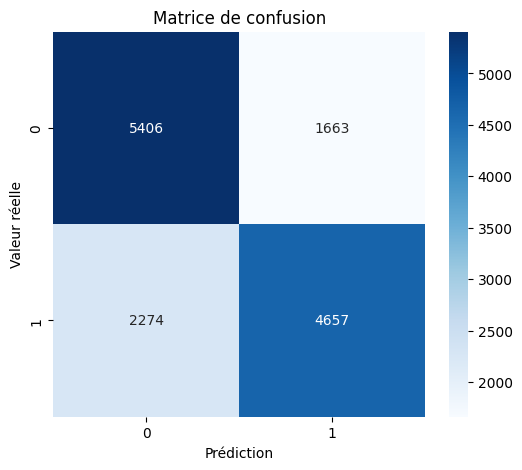

In [77]:
X = df[['age', 'gender', 'weight', 'ap_hi', 'cholesterol', 'active']].values

y= df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_balanced = LogisticRegression(class_weight="balanced",max_iter=10000)
model_balanced.fit(X,y)

y_pred = model_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

Aucun gain n'a été aperçu , l'entrainement du model initial est le meilleur résultat constaté.